In [47]:
from problem import mlp_problem
from environment import Environment
import torch 
from environment import eval_handcrafted_optimizer
import stable_baselines3
from train_agent import eval_agent
import numpy as np
import matplotlib.pyplot as plt

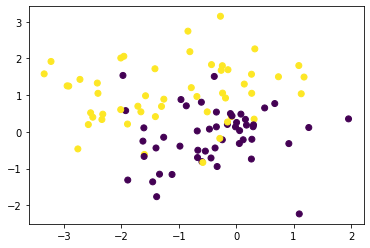

In [48]:
MLP_problem = mlp_problem()
#plot the dataset

x,y = MLP_problem["dataset"]
plt.scatter(x[:,0],x[:,1],c=y)

In [49]:
#show the model
MLP_problem["model0"]

Sequential(
  (0): Linear(in_features=2, out_features=2, bias=True)
  (1): ReLU()
  (2): Linear(in_features=2, out_features=1, bias=True)
  (3): Sigmoid()
)

In [50]:
#show the objective function
MLP_problem["obj_function"](MLP_problem["model0"])

tensor(0.7986, grad_fn=<AddBackward0>)

In [56]:
# define the problem list
nb_problems = 100
train_problem_list = [mlp_problem() for _ in range(nb_problems)]
test_problem_list = [mlp_problem()]
# number of steps in each episode
model_training_steps = 50
agent_training_timesteps = 1000
optimizer_class_list=[torch.optim.SGD, torch.optim.Adam, torch.optim.Adadelta]
history_len = 20

train_env = Environment(problem_list = train_problem_list,
                num_steps = model_training_steps, 
                history_len = history_len, 
                optimizer_class_list = optimizer_class_list
                )
test_env = Environment(problem_list = test_problem_list,
                num_steps = model_training_steps, 
                history_len = history_len, 
                optimizer_class_list = optimizer_class_list,
                do_init_weights = False
                )

policy = stable_baselines3.DQN('MlpPolicy', train_env, verbose=0,
                                            tensorboard_log='tb_logs/norm')


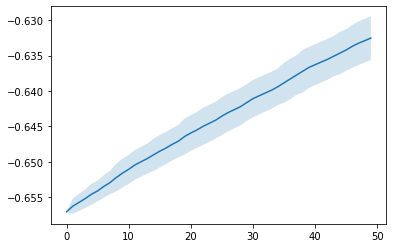

In [58]:
#evaluate trained and untrained agent
#plottig 

actions, rewards = eval_agent(test_env, policy, num_episodes=50, num_steps=model_training_steps)

plt.plot(np.mean(rewards, axis=0), label='untrained')
plt.fill_between(np.arange(len(rewards[0])), np.mean(rewards, axis=0) - np.std(rewards, axis=0), np.mean(rewards, axis=0) + np.std(rewards, axis=0), alpha=0.2)


policy.learn(total_timesteps=agent_training_timesteps)


actions, rewards = eval_agent(test_env, policy, num_episodes=40, num_steps=model_training_steps)




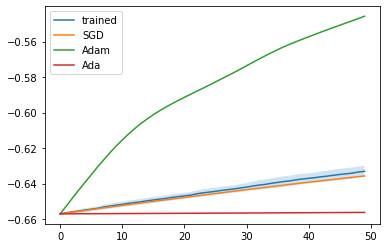

In [59]:
plt.plot(np.mean(rewards, axis=0), label='trained')
plt.fill_between(np.arange(len(rewards[0])), np.mean(rewards, axis=0) - np.std(rewards, axis=0), np.mean(rewards, axis=0) + np.std(rewards, axis=0), alpha=0.2)


#evaluate the handcrafted optimizers
rewards_sgd = eval_handcrafted_optimizer(test_problem_list, torch.optim.SGD, model_training_steps, do_init_weights=False)
rewards_adam = eval_handcrafted_optimizer(test_problem_list, torch.optim.Adam, model_training_steps, do_init_weights=False)
rewards_ada = eval_handcrafted_optimizer(test_problem_list, torch.optim.Adadelta, model_training_steps, do_init_weights=False)
plt.plot(np.mean(rewards_sgd,axis=0), label="SGD")
plt.plot(np.mean(rewards_adam,axis=0), label="Adam")
plt.plot(np.mean(rewards_ada,axis=0), label="Ada")
plt.legend()

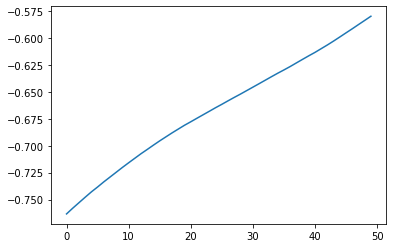

In [45]:
plt.plot(np.mean(rewards, axis=0), label='untrained')

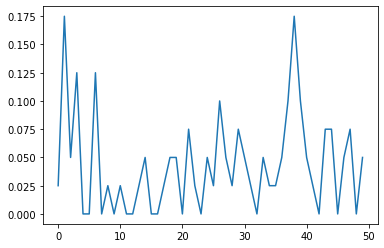

In [60]:
plt.plot(np.mean(actions, axis=0), label='actions')

In [32]:
actions

array([[1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       ...,
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.],
       [1., 1., 1., ..., 1., 1., 1.]])

In [55]:
rewards

array([[-0.65918607, -0.65430123, -0.64952463, ..., -0.46612418,
        -0.46246791, -0.45878619],
       [-0.65918607, -0.65430123, -0.64952463, ..., -0.46956289,
        -0.46581417, -0.462174  ],
       [-0.65918607, -0.65430123, -0.64952463, ..., -0.47677818,
        -0.47286656, -0.46902722],
       ...,
       [-0.65918607, -0.65430123, -0.64952463, ..., -0.47313344,
        -0.46927431, -0.46553186],
       [-0.65918607, -0.65430123, -0.64952463, ..., -0.46612418,
        -0.46246791, -0.45878619],
       [-0.65918607, -0.65430123, -0.65352446, ..., -0.47666413,
        -0.4727504 , -0.46892059]])